In [35]:
import pandas as pd
import ast

df_import = pd.read_csv('import_all_members.csv')

In [36]:
df_export = pd.read_csv('export_all_members.csv')

In [37]:
df_import = df_import.rename(columns ={'Calendar years': 'country'})
df_export = df_export.rename(columns={'Calendar years': 'country'})
df_import.keys()

Index(['country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [38]:
get_cols = ['country', '2019']
import_19 = df_import[get_cols]
export_19= df_export[get_cols]

In [39]:
import_19 = import_19.dropna()
export_19 = export_19.dropna()
export_19

,country,2019
0,Angola,23
1,Bolivia (Plurinational State of),20
2,Brazil,"40,698"
3,Burundi,293
4,Cameroon,250
5,Central African Republic,19
6,Colombia,"13,672"
7,Congo,0
8,Costa Rica,"1,039"
9,Côte d'Ivoire,"2,104"


In [40]:
import_19 = import_19[import_19.country != 'European Union']
import_19

,country,2019
1,Austria,1448
2,Belgium,6199
4,Bulgaria,785
5,Croatia,466
6,Cyprus,133
7,Czechia,1609
8,Denmark,908
9,Estonia,148
10,Finland,1515
11,France,7993


In [41]:
import_19['type'] = 'import'
export_19['type'] = 'export'

In [48]:
df_c = pd.concat([import_19, export_19])
df_c

,country,2019,type
1,Austria,1448,import
2,Belgium,6199,import
4,Bulgaria,785,import
5,Croatia,466,import
6,Cyprus,133,import
...,...,...,...
50,Venezuela,53,export
51,Viet Nam,"27,400",export
52,Yemen,12,export
53,Zambia,27,export


In [49]:
df_c['2019'] = df_c.apply(lambda r: int(r['2019'].replace(',', '')), axis=1)
df_c

,country,2019,type
1,Austria,1448,import
2,Belgium,6199,import
4,Bulgaria,785,import
5,Croatia,466,import
6,Cyprus,133,import
...,...,...,...
50,Venezuela,53,export
51,Viet Nam,27400,export
52,Yemen,12,export
53,Zambia,27,export


In [53]:
amt = 60
unit = 1000
df_c['kg'] = df_c.apply(lambda r: int(r['2019']) * amt * unit, axis=1)
#import_19['kg'] = import_19.apply(lambda r: int(r['2019']) * amt * unit, axis=1)
#export_19['kg'] = export_19.apply(lambda r: int(r['2019']) * amt * unit, axis=1)
#import_19
df_c

,country,2019,type,kg
1,Austria,1448,import,86880000
2,Belgium,6199,import,371940000
4,Bulgaria,785,import,47100000
5,Croatia,466,import,27960000
6,Cyprus,133,import,7980000
...,...,...,...,...
50,Venezuela,53,export,3180000
51,Viet Nam,27400,export,1644000000
52,Yemen,12,export,720000
53,Zambia,27,export,1620000


In [54]:
df_imp = df_c[df_c['type'] == 'import']
df_exp = df_c[df_c['type'] == 'export']
len(df_imp)

34

In [59]:
df_imp = df_imp.sort_values(by='2019', ascending=False)
df_timp = df_imp.head(20)
df_timp = df_timp.reset_index()
df_timp

,index,country,2019,type,kg
0,36,United States of America,30854,import,1851240000
1,12,Germany,22432,import,1345920000
2,16,Italy,10914,import,654840000
3,30,Japan,8040,import,482400000
4,11,France,7993,import,479580000
5,2,Belgium,6199,import,371940000
6,27,Spain,5984,import,359040000
7,32,Russian Federation,5917,import,355020000
8,35,United Kingdom,5554,import,333240000
9,21,Netherlands,5354,import,321240000


In [60]:
df_exp = df_exp.sort_values(by='2019', ascending=False)
df_texp = df_exp.head(20)
df_texp = df_texp.reset_index()
df_texp

,index,country,2019,type,kg
0,2,Brazil,40698,export,2441880000
1,51,Viet Nam,27400,export,1644000000
2,6,Colombia,13672,export,820320000
3,23,Honduras,6765,export,405900000
4,25,Indonesia,6334,export,380040000
5,24,India,6028,export,361680000
6,49,Uganda,4526,export,271560000
7,16,Ethiopia,3921,export,235260000
8,39,Peru,3772,export,226320000
9,19,Guatemala,3613,export,216780000


# Get ISOA3

In [67]:
import pycountry as pyc

In [71]:
pyc.countries.search_fuzzy('England')[0].alpha_3

'GBR'

In [72]:
df_cc = pd.concat([df_texp, df_timp])
df_cc

,index,country,2019,type,kg
0,2,Brazil,40698,export,2441880000
1,51,Viet Nam,27400,export,1644000000
2,6,Colombia,13672,export,820320000
3,23,Honduras,6765,export,405900000
4,25,Indonesia,6334,export,380040000
5,24,India,6028,export,361680000
6,49,Uganda,4526,export,271560000
7,16,Ethiopia,3921,export,235260000
8,39,Peru,3772,export,226320000
9,19,Guatemala,3613,export,216780000


In [73]:
df_cc['iso3'] = df_cc.apply(lambda r: pyc.countries.search_fuzzy(r.country)[0].alpha_3, axis=1)
df_cc

,index,country,2019,type,kg,iso3
0,2,Brazil,40698,export,2441880000,BRA
1,51,Viet Nam,27400,export,1644000000,VNM
2,6,Colombia,13672,export,820320000,COL
3,23,Honduras,6765,export,405900000,HND
4,25,Indonesia,6334,export,380040000,IDN
5,24,India,6028,export,361680000,IND
6,49,Uganda,4526,export,271560000,UGA
7,16,Ethiopia,3921,export,235260000,ETH
8,39,Peru,3772,export,226320000,PER
9,19,Guatemala,3613,export,216780000,GTM


## Get centroids of locations

In [61]:
import geopandas as gpd

In [64]:
 world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [66]:
world['centroid']=world.apply(lambda r: r.geometry.centroid, axis=1)
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",POINT (163.8531646445823 -17.31630942638265)
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75298985475595 -6.257732428506092)
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-12.13783111160779 24.29117296020862)
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",POINT (-98.14238137209708 61.46907614534896)
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",POINT (-112.5994359115045 45.70562800215178)
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",POINT (20.81965192638258 44.23303653365162)
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",POINT (19.2861817215929 42.78903960655908)
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",POINT (20.89535572134223 42.57936713181699)
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",POINT (-61.33036691444967 10.42823708920188)


In [75]:
# gpd.sjoin(world, df_cc, how='left', op='within')
df_select = world[world.iso_a3.isin(df_cc['iso3'].tolist())]

In [77]:
df_select = df_select.rename(columns={'iso_a3': 'iso3'})
df_select

,pop_est,continent,name,iso3,gdp_md_est,geometry,centroid
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.904 -0.950, 34.073 -1.060, 37.699...",POINT (34.75298985475595 -6.257732428506092)
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0...",POINT (-112.5994359115045 45.70562800215178)
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.000 -2.600, 142.735 -3.289...",POINT (145.3175746278225 -6.451644514630347)
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.000 -2.600, 141.017 -5.859...",POINT (117.4234075622736 -2.221737936520542)
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.202 -4.677, 37.767 -3.677, 37.699...",POINT (37.79155528666139 0.5959662521769523)
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",POINT (96.80331818290134 61.961663494923)
27,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.128 32.535, -115.991 32.612, -1...",POINT (-102.5763495239869 23.93537190224484)
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.374 -33.768, -53.651 -33.202, -5...",POINT (-53.05434003576711 -10.80677364349892)
31,31036656,South America,Peru,PER,410400.0,"POLYGON ((-69.894 -4.298, -70.795 -4.251, -70....",POINT (-74.39180581684722 -9.191562905134553)
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.876 1.253, -67.065 1.130, -67.26...",POINT (-73.07773208697478 3.927213862709704)


In [81]:
df_final = df_select.merge(df_cc, on='iso3')
df_final.head()

,pop_est,continent,name,iso3,gdp_md_est,geometry,centroid,index,country,2019,type,kg
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75298985475595 -6.257732428506092),44,Tanzania,1069,export,64140000
1,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",POINT (-112.5994359115045 45.70562800215178),36,United States of America,30854,import,1851240000
2,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",POINT (145.3175746278225 -6.451644514630347),37,Papua New Guinea,787,export,47220000
3,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",POINT (117.4234075622736 -2.221737936520542),25,Indonesia,6334,export,380040000
4,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",POINT (37.79155528666139 0.5959662521769523),27,Kenya,836,export,50160000


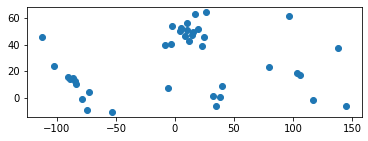

In [99]:
gdf = df_final.rename(columns={'geometry': 'new_series', 'centroid': 'geometry'})
gdf.set_geometry(col='geometry', inplace=True)
gdf.plot()

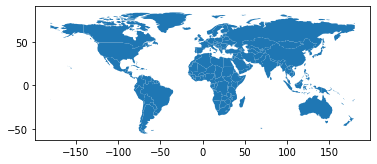

In [85]:
df_world = world[world['continent'] != 'Antarctica']
df_world.plot()

In [103]:
gdf['color'] = gdf.apply(lambda r: 'goldenrod' if r['type'] == 'import' else 'steelblue', axis=1)
gdf

,pop_est,continent,name,iso3,gdp_md_est,new_series,geometry,index,country,2019,type,kg,color
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.904 -0.950, 34.073 -1.060, 37.699...",POINT (34.75299 -6.25773),44,Tanzania,1069,export,64140000,steelblue
1,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0...",POINT (-112.59944 45.70563),36,United States of America,30854,import,1851240000,goldenrod
2,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.000 -2.600, 142.735 -3.289...",POINT (145.31757 -6.45164),37,Papua New Guinea,787,export,47220000,steelblue
3,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.000 -2.600, 141.017 -5.859...",POINT (117.42341 -2.22174),25,Indonesia,6334,export,380040000,steelblue
4,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.202 -4.677, 37.767 -3.677, 37.699...",POINT (37.79156 0.59597),27,Kenya,836,export,50160000,steelblue
5,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",POINT (96.80332 61.96166),32,Russian Federation,5917,import,355020000,goldenrod
6,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.128 32.535, -115.991 32.612, -1...",POINT (-102.57635 23.93537),32,Mexico,2627,export,157620000,steelblue
7,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.374 -33.768, -53.651 -33.202, -5...",POINT (-53.05434 -10.80677),2,Brazil,40698,export,2441880000,steelblue
8,31036656,South America,Peru,PER,410400.0,"POLYGON ((-69.894 -4.298, -70.795 -4.251, -70....",POINT (-74.39181 -9.19156),39,Peru,3772,export,226320000,steelblue
9,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.876 1.253, -67.065 1.130, -67.26...",POINT (-73.07773 3.92721),6,Colombia,13672,export,820320000,steelblue


In [124]:
import numpy as np

minVal = min(gdf['kg'])
maxVal = max(gdf['kg'])
np.interp(64140000, (minVal, maxVal), (100, 10000))


23.867685111464965

In [127]:
gdf['d'] = gdf.apply(lambda r: np.interp(r['kg'], (minVal, maxVal), (10, 1000)), axis=1)
gdf

,pop_est,continent,name,iso3,gdp_md_est,new_series,geometry,index,country,2019,type,kg,color,d
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.904 -0.950, 34.073 -1.060, 37.699...",POINT (34.75299 -6.25773),44,Tanzania,1069,export,64140000,steelblue,23.867685
1,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0...",POINT (-112.59944 45.70563),36,United States of America,30854,import,1851240000,goldenrod,757.524881
2,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.000 -2.600, 142.735 -3.289...",POINT (145.31757 -6.45164),37,Papua New Guinea,787,export,47220000,steelblue,16.921527
3,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.000 -2.600, 141.017 -5.859...",POINT (117.42341 -2.22174),25,Indonesia,6334,export,380040000,steelblue,153.553941
4,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.202 -4.677, 37.767 -3.677, 37.699...",POINT (37.79156 0.59597),27,Kenya,836,export,50160000,steelblue,18.128483
5,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",POINT (96.80332 61.96166),32,Russian Federation,5917,import,355020000,goldenrod,143.282494
6,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.128 32.535, -115.991 32.612, -1...",POINT (-102.57635 23.93537),32,Mexico,2627,export,157620000,steelblue,62.243979
7,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.374 -33.768, -53.651 -33.202, -5...",POINT (-53.05434 -10.80677),2,Brazil,40698,export,2441880000,steelblue,1000.000000
8,31036656,South America,Peru,PER,410400.0,"POLYGON ((-69.894 -4.298, -70.795 -4.251, -70....",POINT (-74.39181 -9.19156),39,Peru,3772,export,226320000,steelblue,90.447353
9,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.876 1.253, -67.065 1.130, -67.26...",POINT (-73.07773 3.92721),6,Colombia,13672,export,820320000,steelblue,334.301851


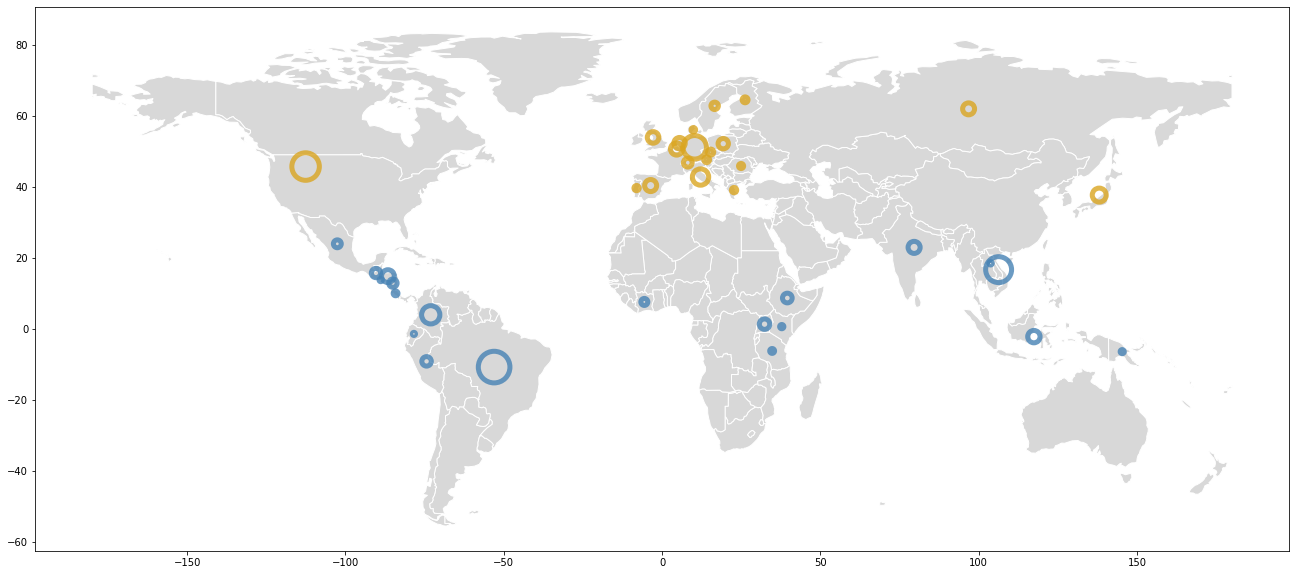

In [139]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize = (30, 10))
base = df_world.plot(ax=ax, color='#d8d8d8', edgecolor='white')
gdf.plot(ax=base, edgecolor=gdf['color'], linewidth=5, color='none', markersize=gdf['d'], alpha=0.8)